### Name: Sherlock Holmes

Andrew ID:

### Instructions
1. Fill in your name and Andrew ID.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any question for which your code fails to run will receive 0 points.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).
6. Have fun!

### [Problem 1] Python Basics [10 pts]
This problem helps you get familiar with (or review) some basic Python operations. 

Consider the following two lists:

In [1]:
a = [13, 1, 55, 34, 2, 3, 89, 5, 8, 21]
b = [17,55, 34, 2, 3, 8, 9, 1, 4, 5, 6, 7, 20, 21, 36]

(a) [2 pts] Find the elements that are common between the lists and store it in a new list. Print the new list.

In [2]:
c = [x for x in a if x in b]
print(c)

[1, 55, 34, 2, 3, 5, 8, 21]


(b) [3 pts] Write **one line** of code that takes this list of common elements and makes another new list that has only the even numbers of this list in it (hint: use a list comprehension). Print the new list. (So your code here should be tow lines: the first line computes the list and stores it in a variable, and the second line prints the variable.)

In [3]:
d = [x for x in c if x % 2 == 0]
print(d)

[34, 2, 8]


(c) [5 pts] Write a function that takes a list as input, finds the maximum value in the list, and returns the maximum value as the output. (Do NOT use the built-in `max()` function, or any other packages. Write it yourself.) Test the function with the list you generated in part (b) of this problem.

In [4]:
import numbers

def find_max(l):
    if not isinstance(l, list):
        print("The input is not a list.")
        return
    elif not l:
        print("The given list is empty, and no maximum value can be found.")
        return
    elif not all(isinstance(x, numbers.Number) for x in l):
        print("The given list contains non-numeric element(s).")
        return
    else:
        maximum = float('-inf')
        for element in l:
            if element > maximum:
                maximum = element
        return maximum

print(find_max(10))
print(find_max([]))
print(find_max([0, 2, -5, '10', 3.5]))
print(find_max(d))

The input is not a list.
None
The given list is empty, and no maximum value can be found.
None
The given list contains non-numeric element(s).
None
34


### [Problem 2] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package (https://spacy.io). Instructions for installing this are part of the tutorial file "`95-865 Anaconda and Jupyter setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture (we have included it in this homework assignment as the file "`95-865 spaCy demo.ipynb`").

(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project (https://www.gutenberg.org/browse/scores/top). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [5]:
import glob
corpus_text = ''
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename) as f:
        corpus_text += f.read()

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks.

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [6]:
# There are many ways to solve this problem. We present two solutions, one
# using numpy's argsort, and another solution using Pandas. However, the
# first part of both solutions is the same and is about computing the
# histogram:

import spacy
import re
from collections import Counter

nlp = spacy.load('en')
doc = nlp(corpus_text)

histogram = Counter()
for token in doc:
    lemma = token.lemma_
    if re.match('[a-zA-Z]+$', lemma):
        histogram[lemma] += 1

In [7]:
# Solution 1 for sorting and printing out the most frequent lemmas:
# use numpy's argsort

import numpy as np

# convert histogram into two lists `lemmas_unsorted` and `counts_unsorted`
# where the i-th lemma in `lemmas_unsorted` has raw counts given by
# `counts_unsorted[i]`
lemmas_unsorted = []
counts_unsorted = []
for lemma, count in histogram.items():
    lemmas_unsorted.append(lemma)
    counts_unsorted.append(count)
counts_unsorted = np.array(counts_unsorted)  # to allow for fancy numpy indexing

# compute the indices that would sort the list `counts_unsorted` in
# decreasing order (which is why there's a "::-1")
sort_indices = np.argsort(counts_unsorted)[::-1]
sorted_counts = counts_unsorted[sort_indices]  # actually for later problem subparts

print('Rank'.ljust(5), 'Lemma'.ljust(10), 'Raw Count')
for rank, idx in enumerate(sort_indices[:50]):
    print(str(rank + 1).ljust(5), lemmas_unsorted[idx].ljust(10), counts_unsorted[idx])

Rank  Lemma      Raw Count
1     the        703040
2     be         438284
3     and        436049
4     of         386402
5     to         324526
6     a          234146
7     in         204369
8     have       159582
9     that       159142
10    not        110600
11    with       101248
12    for        95439
13    as         90860
14    but        75888
15    do         68888
16    at         65031
17    on         62908
18    by         61992
19    this       61343
20    which      58932
21    all        58822
22    say        58566
23    from       50107
24    so         48117
25    or         47838
26    will       43115
27    one        41275
28    man        40159
29    no         38567
30    what       37922
31    there      37287
32    if         34981
33    go         34025
34    when       33646
35    would      32745
36    come       32497
37    an         32470
38    see        32059
39    who        30950
40    make       30450
41    then       27360
42    may        26

In [20]:
counts_unsorted[:50].sum()

2571392

In [8]:
# Solution 2 for sorting and printing out the most frequent lemmas:
# use Pandas

import pandas as pd

count = pd.Series(histogram)
count = count.sort_values(ascending=False)

freq_table = pd.DataFrame(count)
freq_table.reset_index(inplace=True)
freq_table.columns = ['Word', 'Raw Count']
freq_table.index.rename('Rank', inplace=True)
freq_table.reset_index(inplace=True)
freq_table['Rank'] += 1
print(freq_table.head(50))

    Rank   Word  Raw Count
0      1    the     703040
1      2     be     438284
2      3    and     436049
3      4     of     386402
4      5     to     324526
5      6      a     234146
6      7     in     204369
7      8   have     159582
8      9   that     159142
9     10    not     110600
10    11   with     101248
11    12    for      95439
12    13     as      90860
13    14    but      75888
14    15     do      68888
15    16     at      65031
16    17     on      62908
17    18     by      61992
18    19   this      61343
19    20  which      58932
20    21    all      58822
21    22    say      58566
22    23   from      50107
23    24     so      48117
24    25     or      47838
25    26   will      43115
26    27    one      41275
27    28    man      40159
28    29     no      38567
29    30   what      37922
30    31  there      37287
31    32     if      34981
32    33     go      34025
33    34   when      33646
34    35  would      32745
35    36   come      32497
3

(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y axis and rank as the x axis), and a **log-log plot** (use logarithmic scales on both the x and y axes). This should be for the full table and not just the top 50 words! For the x axis, you do not need to label what the words are; the numbers there should just correspond to the ranks of the words.

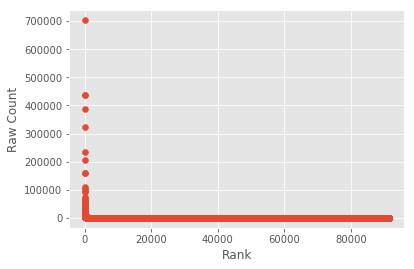

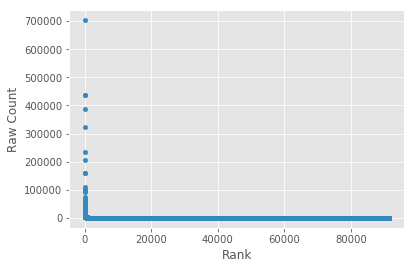

In [9]:
# Raw scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # makes prettier plots

# Using Solution 1 from part (b):
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')

# Using Solution 2 from part (b) instead:
freq_table.plot.scatter('Rank', 'Raw Count')

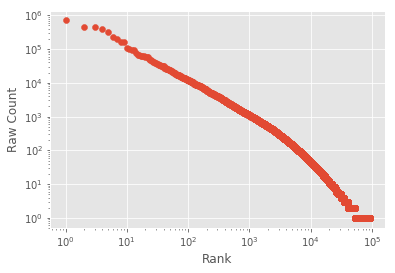

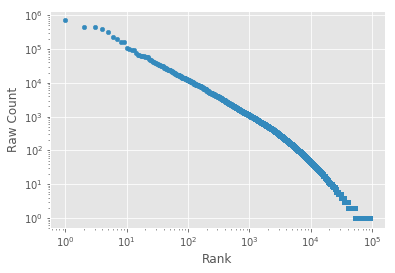

In [10]:
# Log-log plot

# The only change in the code from the previous part is specifying the x and y axes scaling.

# Using Solution 1 from part (b):
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')
axis = plt.gca()  # gets the current axis
axis.set_xscale('log')
axis.set_yscale('log')

# Using Solution 2 from part (b) instead:
freq_table.plot.scatter('Rank', 'Raw Count')
axis = plt.gca()  # gets the current axis
axis.set_xscale('log')
axis.set_yscale('log')

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code):

**Answer:** The log-log plot of frequency and rank are fitted in a line with negative slope. It is consist with the power law, as the power law suggests $log(f(r)) = -clog(r)$, which is a line with slope of $-c$.

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers. (The answer here should be exact--do not use a randomized procedure to approximate the probability.)

In [11]:
# Using Solution 1 from part (b):
print('Probability of drawing one of the 4 most frequent words: ')
print(sorted_counts[:4].sum() / sorted_counts.sum())
print('Probability of drawing one of the 50 most frequent words: ')
print(sorted_counts[:50].sum() / sorted_counts.sum())

print()  # just to add some spacing between the two solutions we're providing

# Using Solution 2 from part (b):
print('Probability of drawing one of the 4 most frequent words: ')
print(freq_table['Raw Count'][:4].sum() / freq_table['Raw Count'].sum())
print('Probability of drawing one of the 50 most frequent words: ')
print(freq_table['Raw Count'][:50].sum() / freq_table['Raw Count'].sum())

Probability of drawing one of the 4 most frequent words: 
0.181723868741
Probability of drawing one of the 50 most frequent words: 
0.457913241526

Probability of drawing one of the 4 most frequent words: 
0.18172386874109783
Probability of drawing one of the 50 most frequent words: 
0.4579132415257374


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [12]:
# Using Solution 1 from part (b):
print("Occur only once: ")
print((sorted_counts == 1).sum() / len(sorted_counts))
print("Occur fewer than 10 times: ")
print((sorted_counts < 10).sum() / len(sorted_counts))

print()  # just to add some spacing between the two solutions we're providing

# Using Solution 2 from part (b):
print("Occur only once: ")
print((freq_table['Raw Count'] == 1).sum() / len(freq_table))
print("Occur fewer than 10 times: ")
print((freq_table['Raw Count'] < 10).sum() / len(freq_table))

Occur only once: 
0.431552925477
Occur fewer than 10 times: 
0.759551962897

Occur only once: 
0.431552925477
Occur fewer than 10 times: 
0.759551962897


### [Problem 3] Entity Recognition and Pointwise Mutual Information (PMI) [40 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is http://localhost:8888/tree), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

**Important:** For counting occurrences and co-occurrences, count the number of articles that have a particular entity.

(a) [12 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [13]:
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en')
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

([<matplotlib.axis.YTick at 0x1b76402b38>,
 <a list of 18 Text yticklabel objects>)

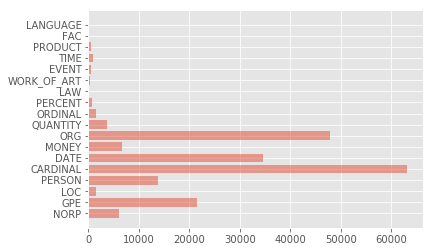

In [14]:
for article in reuters_nlp:
    label_list = [ent.label_ for ent in article.ents]
    label_counter.update(label_list)
labels = [item[0] for item in label_counter.items()]
label_occurences = [item[1] for item in label_counter.items()]
y_pos = range(len(labels))
plt.barh(y_pos, label_occurences, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

(b) [12 pts] Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

In [15]:
# In this solution, in counting the frequency, we are counting
# how many articles have an entity occur (and so per article,
# we add 1 if the article has the entity and 0 otherwise). To
# change this to counting the total number of times the entity
# has occurred, you would simply remove the call to the function
# `set()` below.

common_org = Counter()
common_gpe = Counter()

for article in reuters_nlp:
    org_list = set([ent.lemma_ for ent in article.ents if ent.label_ == u"ORG"])
    gpe_list = set([ent.lemma_ for ent in article.ents if ent.label_ == u"GPE"])
    
    # for counting total number of times entities occur and not just whether
    # they occured in the article or not:
    # org_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"ORG"]
    # gpe_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"GPE"]
    common_org.update(org_list)
    common_gpe.update(gpe_list)

print('Most frequently occurring organizations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_org.most_common(10)]))

print()

print('Most frequently occurring locations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_gpe.most_common(10)]))

Most frequently occurring organizations:
  qtr: 915
  reuters: 439
  usda: 257
  ec: 243
  the securities and exchange commission: 228
  the u.s. agriculture department: 168
  treasury: 163
  the bank of england: 155
  fed: 137
  congress: 133

Most frequently occurring locations:
  u.s.: 1752
  japan: 555
  the united states: 384
  u.k.: 316
  canada: 253
  washington: 230
  west germany: 227
  new york: 214
  brazil: 190
  london: 189


(c) [16 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? (Hint: To compute this ranking, you do not have to compute the full PMI equation.)

**Solution note:** For a specific `GPE` entity $x$, we have

$$\text{PMI}(\text{opec}, x)
= \log\frac{P(\text{opec}, x)}{P(\text{opec})P(x)}
= \log\frac{\frac{\text{# articles opec and }x\text{ are both in}}{\text{total # articles}}}{P(\text{opec})\frac{\text{# articles }x\text{ is in}}{\text{total # articles}}}
= \log\frac{\text{# articles opec and }x\text{ are both in}}{P(\text{opec})(\text{# articles }x\text{ is in})}\,.$$

For different values of $x$, $P(\text{opec})$ is a constant! This means that in terms of ordering the different $x$'s by PMI, we do not need to compute $P(\text{opec})$. Moreover, whether we take the logarithm or not also doesn't affect the ordering of the $x$'s according to PMI. Thus, for each $x$, it suffices to compute the fraction

$$\frac{\text{# articles opec and }x\text{ are both in}}{\text{# articles }x\text{ is in}}\,.$$

By sorting the $x$'s according to this fraction, we get the same ordering as if we sorted the $x$'s according to PMI.

In [16]:
co_occurrence_counts = Counter()
gpe_counts = Counter()

for article in reuters_nlp:
    article_gpe = set([ent.lemma_ for ent in article.ents if ent.label_ == u'GPE'])
    article_org = set([ent.lemma_ for ent in article.ents if ent.label_ == u'ORG'])
    gpe_counts.update(article_gpe)
    if u'opec' in article_org:
        co_occurrence_counts.update(article_gpe)

# we don't need to use the log function as it doesn't affect the ordering
# of the items by PMI; moreover, there are some denominator terms that are
# the same that do not affect the ordering
part_of_pmi_equation = dict()
for gpe, co_occurrence_count in co_occurrence_counts.items():
    part_of_pmi_equation[gpe] = co_occurrence_count / gpe_counts[gpe]

print('Rank'.ljust(5), 'Location'.ljust(30), 'Co-occurrence Count'.ljust(20), 'Occurence Count'.ljust(20))
for i, w in enumerate(sorted(part_of_pmi_equation,
                             key=part_of_pmi_equation.get,
                             reverse=True)[:50]):
    print(str(i+1).ljust(5), w.ljust(30), str(co_occurrence_counts[w]).ljust(20), str(gpe_counts[w]).ljust(20))

Rank  Location                       Co-occurrence Count  Occurence Count     
1     japan indonesia 's             1                    1                   
2     aramco                         1                    1                   
3     petromin                       1                    1                   
4     ekofisk                        1                    1                   
5     september norway 's            1                    1                   
6     ula                            1                    1                   
7     statfjord                      1                    1                   
8     sungari                        1                    1                   
9     miraflores                     1                    1                   
10    bethesda                       1                    1                   
11    saudi arabian                  2                    2                   
12    wellemeyer                     1              

Your text answer (for this question, your answer is *not* code):

**Answer:** Entities such as 'dubai' and 'qatar' were expected to have highest ranks since they are directly related to OPEC. However, in the result, somewhat meaningless entities have highest PMI values. This might be due to several reasons. First, the entity recognition labeling of spaCy is imperfect. Second, the number of documents (here, newspaper articles) might have been too small. Third, result reflects the nature of PMI, which gives high scores to rare words.

### [Problem 4] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form:
https://goo.gl/forms/Q0cz2NhZbuIuS8iR2